In [73]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/[[[2024 - Full stack web development and AI with Python (Django)]]]/10. Beginners Data science  - load, clean, visualise and analyse big data/titanic/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
data.sample()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S


In [77]:
data['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [78]:
data['Age'] = 0

In [79]:
data['Age']

,Age
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,0
889,0


In [80]:
del data['Cabin']

In [84]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Visualization** <br>
Crosstab: is simple way of looking at two variables interacting. This function is from pandas library. <br>
countplot: is simple way of looking at two variables interacting. This function is from seaborn library. <br>
factorplot: is simple way to see the three variables interacting. This is also from seaborn library.

In [85]:
pd.crosstab(data['Sex'], data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


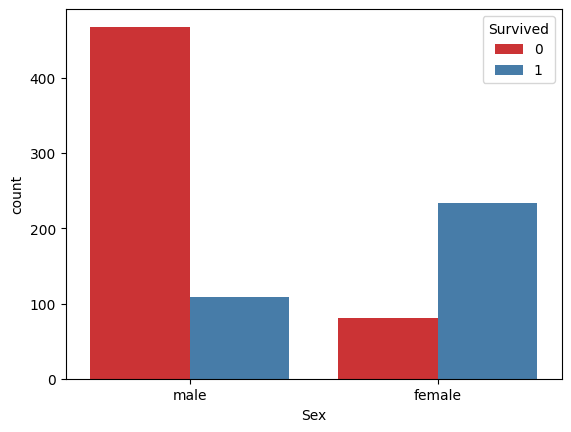

In [22]:
ax = sns.countplot(x='Sex', hue='Survived', palette='Set1', data=data)

In [86]:
ax.set(title='Survivor according to Sex', xlabel='Sex', ylabel='total')

[Text(0.5, 1.0, 'Survivor according to Sex'),
 Text(0.5, 24.0, 'Sex'),
 Text(24.000000000000007, 0.5, 'total')]

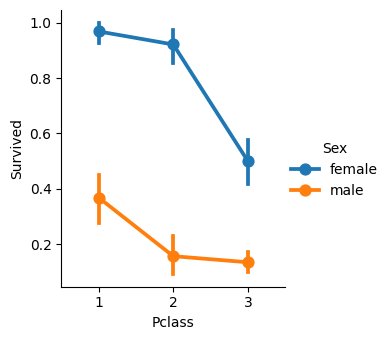

In [87]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point', aspect=0.9, height=3.5)

The 4Cs of Data Science <br>
1. Correcting
2. Completing
3. Creating (Feature Engineering)
4. Converting





**1. Correcting:** IF there is any outlying data that seems it is incorrect and could throw off our models.<br>
**E.g.** <br>
**Age: 80** - it is ok as human age. <br>
**Age: 808** - But it is suspicious as human age, it should be removed./

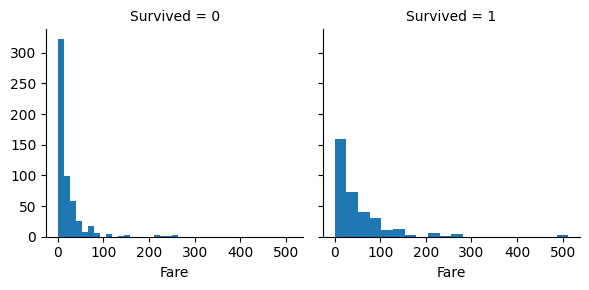

In [88]:
#correcting
graph = sns.FacetGrid(data, col='Survived')
graph.map(plt.hist, 'Fare', bins=20)

Thus we check the outlier. We can replace the outlier with median() or drop it. Since, median() is the most commonly occuring that in the data.

In [89]:
data.loc[data['Fare']>400, 'Fare'] = data['Fare'].median()

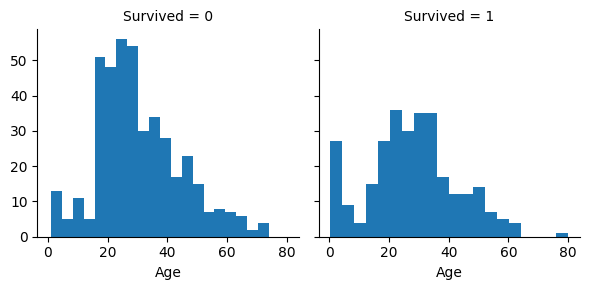

In [90]:
graph_age = sns.FacetGrid(data, col='Survived')
graph_age.map(plt.hist, 'Age', bins=20)

In [91]:
data.loc[data['Age']>70, 'Age'] = data['Age'].median()

**2. Completing:** Mainly filling the null values <br>
E.g. - Missing value for age <br>
Mainly can infer from other individul details such as profession. <br>
People often use median() values (the most commonly occuring number) to replace.

In [92]:
# Completing
# First of all how many no values we have in each column
for column in data:
  print(column, ': ', data[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2


Then less missing calue column will be replaced and Most missing value column will be deleted.

In [93]:
data['Age'] = data['Age'].fillna(data['Age'].median())
#data.loc[:, 'Age'] = data['Age'].fillna(data['Age'].median())

In [94]:
print(data['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [95]:
data['Embarked'] = data['Embarked'].fillna('S')

In [96]:
del data['Cabin']

**3. Creating (Feature Engineering/Scaling):** <br>
Using existing features (e.g. title) to create new features (e.g. Sex) to help in the predictive power of our model. <br>
Also often helps to simplify our variables into fewer categories sometimes.

In [97]:
data['Name'].sample(20)

,Name
747,"Sinkkonen, Miss. Anna"
663,"Coleff, Mr. Peju"
348,"Coutts, Master. William Loch ""William"""
426,"Clarke, Mrs. Charles V (Ada Maria Winfield)"
86,"Ford, Mr. William Neal"
586,"Jarvis, Mr. John Denzil"
303,"Keane, Miss. Nora A"
213,"Givard, Mr. Hans Kristensen"
190,"Pinsky, Mrs. (Rosa)"
401,"Adams, Mr. John"


In [98]:
# Lets create a function where we were able to extract the title
def get_title(name):
  if '.' in name:
    return name.split(',')[1].split('.')[0].strip()
  else:
    return 'No title in name'

And then using functional programming here we were able to take the names of the data frame where we would map that into a set where we apply it to each those names. I get tied to function.

In [99]:
titles = set([x for x in data.Name.map(lambda x: get_title(x))])

In [100]:
print(titles)

{'Don', 'Mlle', 'Capt', 'Mrs', 'the Countess', 'Jonkheer', 'Dr', 'Lady', 'Major', 'Master', 'Sir', 'Ms', 'Mr', 'Col', 'Miss', 'Mme', 'Rev'}


In [101]:
def shorter_titles(x):
  titles = x['Title']
  if titles in ['Capt', 'Col', 'Major']:
    return 'Officer'
  elif titles in ['Jonkheer', 'Don', 'the Countess', 'Dona', 'Lady', 'Sir']:
    return 'Royalty'
  elif titles == 'Mme':
    return 'Mrs'
  elif titles in ['Mlle', 'Ms']:
    return 'Miss'
  else:
    return titles

In [102]:
data['Title'] = data['Name'].map(lambda x: get_title(x))

In [103]:
data['Title'] = data.apply(shorter_titles, axis=1)

In [104]:
print(data['Title'].value_counts())

Title
Mr         517
Miss       185
Mrs        126
Master      40
Dr           7
Rev          6
Royalty      5
Officer      5
Name: count, dtype: int64


In [105]:
data.drop('Name', axis=1, inplace=True)

In [106]:
data.sample(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
810,811,0,3,male,26.0,0,0,3474,7.8875,S,Mr
577,578,1,1,female,39.0,1,0,13507,55.9000,S,Mrs
494,495,0,3,male,21.0,0,0,A/4 45380,8.0500,S,Mr
576,577,1,2,female,34.0,0,0,243880,13.0000,S,Miss
227,228,0,3,male,20.5,0,0,A/5 21173,7.2500,S,Mr
785,786,0,3,male,25.0,0,0,374887,7.2500,S,Mr
623,624,0,3,male,21.0,0,0,350029,7.8542,S,Mr
604,605,1,1,male,35.0,0,0,111426,26.5500,C,Mr
718,719,0,3,male,28.0,0,0,36568,15.5000,Q,Mr
151,152,1,1,female,22.0,1,0,113776,66.6000,S,Mrs


**4. Converting:** OOur model needs everything to be provided as numbers <br>
E.g. male = 0, female = 1 <br>
Can be very difficult to convert names to numbers, for examples, solution can be use their titles, or see if there is any correlation between name (and comonly occuring names we can categories0 and outcome.

In [107]:
data.drop('Ticket', axis=1, inplace=True)

In [110]:
data.sample(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
744,745,1,3,0,31.0,0,0,7.9250,0,0
682,683,0,3,0,20.0,0,0,9.2250,0,0
32,33,1,3,1,28.0,0,0,7.7500,2,1
851,852,0,3,0,28.0,0,0,7.7750,0,0
843,844,0,3,0,34.5,0,0,6.4375,1,0
357,358,0,2,1,38.0,0,0,13.0000,0,1
392,393,0,3,0,28.0,2,0,7.9250,0,0
525,526,0,3,0,40.5,0,0,7.7500,2,0
440,441,1,2,1,45.0,1,1,26.2500,0,2
80,81,0,3,0,22.0,0,0,9.0000,0,0


In [112]:
data['Sex'] = data['Sex'].replace(('male', 'female'), (0, 1))
data['Embarked'] = data['Embarked'].replace(('S', 'C', 'Q'), (0, 1, 2))
data['Title'] = data['Title'].replace(('Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Officer', 'Royalty'), (0, 1, 2, 3, 4, 5, 6, 7))

In [113]:
data.sample(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
65,66,1,3,0,28.0,1,1,15.2458,1,3
346,347,1,2,1,40.0,0,0,13.0000,0,1
859,860,0,3,0,28.0,0,0,7.2292,1,0
633,634,0,1,0,28.0,0,0,0.0000,0,0
752,753,0,3,0,33.0,0,0,9.5000,0,0
74,75,1,3,0,32.0,0,0,56.4958,0,0
374,375,0,3,1,3.0,3,1,21.0750,0,1
131,132,0,3,0,20.0,0,0,7.0500,0,0
428,429,0,3,0,28.0,0,0,7.7500,2,0
263,264,0,1,0,40.0,0,0,0.0000,0,0
